In [3]:
## Importando as libs necessárias
from google.colab import files
import os, io, time

# Criando o diretório inicial: /content/
os.chdir('/content/')
try:
  os.mkdir('Imagens', )
except:
  print('A pasta já existe.')
os.chdir('./Imagens')
os.listdir()
uploaded_images = files.upload()



A pasta já existe.


Saving wheaten_terrier_9.jpg to wheaten_terrier_9 (1).jpg
Saving leonberger_194.jpg to leonberger_194 (1).jpg
Saving Abyssinian_71.jpg to Abyssinian_71 (1).jpg
Saving Abyssinian_123.jpg to Abyssinian_123 (1).jpg
Saving leonberger_29.jpg to leonberger_29 (1).jpg
Saving wheaten_terrier_5.jpg to wheaten_terrier_5 (1).jpg
Saving wheaten_terrier_110.jpg to wheaten_terrier_110 (1).jpg
Saving wheaten_terrier_13.jpg to wheaten_terrier_13 (1).jpg
Saving wheaten_terrier_159.jpg to wheaten_terrier_159 (1).jpg
Saving Persian_43.jpg to Persian_43 (1).jpg
Saving Abyssinian_182.jpg to Abyssinian_182 (1).jpg
Saving Persian_202.jpg to Persian_202 (1).jpg
Saving leonberger_60.jpg to leonberger_60 (1).jpg
Saving wheaten_terrier_111.jpg to wheaten_terrier_111 (1).jpg
Saving wheaten_terrier_93.jpg to wheaten_terrier_93 (1).jpg
Saving wheaten_terrier_150.jpg to wheaten_terrier_150 (1).jpg
Saving wheaten_terrier_65.jpg to wheaten_terrier_65 (1).jpg
Saving Abyssinian_21.jpg to Abyssinian_21 (1).jpg
Saving Per

# Aplicando HOG

In [4]:
## Reduzir as imagens
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
## pandas
import pandas as pd
## Importando PCA do SkLearn
from sklearn.decomposition import PCA

hogs = [16,20,24,28,32,40]
pcas = [.10,.15,.20,.25,.30,.35,.40,.45,.50,.55,.60,.65,.70,.75,.80,.85,.90,.95]


hogs_pcas = []

for hog_size in hogs:
  hog_features = []
  for filename in uploaded_images.keys():
    image = imread(filename)
    image_resized = resize(image, (128,128))
    fd, hog_image = hog(image_resized, orientations=9, pixels_per_cell=(hog_size, hog_size),
                      cells_per_block=(2, 2), visualize=True, channel_axis=-1)
    hog_features.append(fd)

  ## Adicionar as colunas com os valores do hog para cada um
  data = {"pathfile": uploaded_images.keys(), "hog_features": hog_features}
  df = pd.DataFrame(data)
  df['classe'] = df['pathfile'].str.split('_').str[0]
  df = df.drop('pathfile', axis=1)

  # transformando cada valor do hog_feature em um atributo (coluna)
  df2 = pd.DataFrame(df['hog_features'].tolist())
  df2.columns = df2.columns.map(lambda x: f'hog_feature_{x+1}')
  df = pd.concat([df.drop('hog_features', axis=1), df2], axis=1)

  # ----- COMEÇANDO PCA ------
  for porcent in pcas:
    y = df.classe # Target variable (classe)
    X = df.copy().drop('classe', axis=1) # Features

    ##pca_obj = PCA(n_components=4) #para dizer quantos componentes quero ter
    pca_obj = PCA(n_components=porcent, whiten=True) #qual porcentagem de informação eu quero
    pca_result = pca_obj.fit_transform(X)

    print(f'hog de {hog_size}x{hog_size} e pca de {porcent}')
    print(f'shape: {pca_result.shape}')
    print()

    colunas = []
    for i in range(pca_result.shape[1]):
      colunas.append('pca_'+str(i))

    pca_dataset = pd.DataFrame(data = pca_result, columns = colunas) # Atual

    ## Juntando o atributo classe
    final_data = pca_dataset.join(y)

    # Salvando Pessoa.csv transformado
    df_hog_pca = pd.DataFrame(final_data)
    df_hog_pca.to_csv(f'{hog_size}x{hog_size}_pca-{porcent}.csv', index=False)

    # Importando arquivo transformado
    from google.colab import files
    files.download(f'{hog_size}x{hog_size}_pca-{porcent}.csv')
    hogs_pcas.append([hog_size, porcent, df_hog_pca])



hog de 16x16 e pca de 0.1
shape: (800, 2)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 16x16 e pca de 0.15
shape: (800, 4)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 16x16 e pca de 0.2
shape: (800, 7)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 16x16 e pca de 0.25
shape: (800, 10)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 16x16 e pca de 0.3
shape: (800, 14)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 16x16 e pca de 0.35
shape: (800, 19)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 16x16 e pca de 0.4
shape: (800, 24)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 16x16 e pca de 0.45
shape: (800, 31)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 16x16 e pca de 0.5
shape: (800, 39)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 16x16 e pca de 0.55
shape: (800, 49)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 16x16 e pca de 0.6
shape: (800, 60)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 16x16 e pca de 0.65
shape: (800, 74)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 16x16 e pca de 0.7
shape: (800, 90)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 16x16 e pca de 0.75
shape: (800, 111)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 16x16 e pca de 0.8
shape: (800, 138)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 16x16 e pca de 0.85
shape: (800, 173)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 16x16 e pca de 0.9
shape: (800, 225)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 16x16 e pca de 0.95
shape: (800, 313)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 20x20 e pca de 0.1
shape: (800, 2)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 20x20 e pca de 0.15
shape: (800, 3)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 20x20 e pca de 0.2
shape: (800, 5)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 20x20 e pca de 0.25
shape: (800, 7)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 20x20 e pca de 0.3
shape: (800, 10)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 20x20 e pca de 0.35
shape: (800, 13)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 20x20 e pca de 0.4
shape: (800, 16)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 20x20 e pca de 0.45
shape: (800, 21)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 20x20 e pca de 0.5
shape: (800, 25)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 20x20 e pca de 0.55
shape: (800, 31)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 20x20 e pca de 0.6
shape: (800, 38)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 20x20 e pca de 0.65
shape: (800, 46)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 20x20 e pca de 0.7
shape: (800, 56)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 20x20 e pca de 0.75
shape: (800, 69)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 20x20 e pca de 0.8
shape: (800, 85)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 20x20 e pca de 0.85
shape: (800, 107)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 20x20 e pca de 0.9
shape: (800, 141)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 20x20 e pca de 0.95
shape: (800, 200)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 24x24 e pca de 0.1
shape: (800, 1)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 24x24 e pca de 0.15
shape: (800, 3)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 24x24 e pca de 0.2
shape: (800, 4)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 24x24 e pca de 0.25
shape: (800, 6)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 24x24 e pca de 0.3
shape: (800, 7)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 24x24 e pca de 0.35
shape: (800, 10)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 24x24 e pca de 0.4
shape: (800, 12)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 24x24 e pca de 0.45
shape: (800, 15)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 24x24 e pca de 0.5
shape: (800, 19)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 24x24 e pca de 0.55
shape: (800, 23)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 24x24 e pca de 0.6
shape: (800, 28)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 24x24 e pca de 0.65
shape: (800, 33)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 24x24 e pca de 0.7
shape: (800, 40)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 24x24 e pca de 0.75
shape: (800, 49)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 24x24 e pca de 0.8
shape: (800, 60)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 24x24 e pca de 0.85
shape: (800, 76)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 24x24 e pca de 0.9
shape: (800, 100)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 24x24 e pca de 0.95
shape: (800, 143)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 28x28 e pca de 0.1
shape: (800, 1)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 28x28 e pca de 0.15
shape: (800, 2)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 28x28 e pca de 0.2
shape: (800, 3)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 28x28 e pca de 0.25
shape: (800, 4)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 28x28 e pca de 0.3
shape: (800, 5)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 28x28 e pca de 0.35
shape: (800, 7)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 28x28 e pca de 0.4
shape: (800, 8)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 28x28 e pca de 0.45
shape: (800, 10)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 28x28 e pca de 0.5
shape: (800, 13)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 28x28 e pca de 0.55
shape: (800, 15)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 28x28 e pca de 0.6
shape: (800, 18)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 28x28 e pca de 0.65
shape: (800, 22)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 28x28 e pca de 0.7
shape: (800, 27)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 28x28 e pca de 0.75
shape: (800, 32)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 28x28 e pca de 0.8
shape: (800, 39)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 28x28 e pca de 0.85
shape: (800, 50)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 28x28 e pca de 0.9
shape: (800, 65)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 28x28 e pca de 0.95
shape: (800, 93)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 32x32 e pca de 0.1
shape: (800, 1)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 32x32 e pca de 0.15
shape: (800, 2)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 32x32 e pca de 0.2
shape: (800, 3)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 32x32 e pca de 0.25
shape: (800, 4)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 32x32 e pca de 0.3
shape: (800, 5)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 32x32 e pca de 0.35
shape: (800, 7)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 32x32 e pca de 0.4
shape: (800, 8)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 32x32 e pca de 0.45
shape: (800, 10)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 32x32 e pca de 0.5
shape: (800, 12)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 32x32 e pca de 0.55
shape: (800, 15)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 32x32 e pca de 0.6
shape: (800, 18)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 32x32 e pca de 0.65
shape: (800, 22)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 32x32 e pca de 0.7
shape: (800, 26)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 32x32 e pca de 0.75
shape: (800, 32)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 32x32 e pca de 0.8
shape: (800, 39)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 32x32 e pca de 0.85
shape: (800, 49)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 32x32 e pca de 0.9
shape: (800, 64)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 32x32 e pca de 0.95
shape: (800, 92)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 40x40 e pca de 0.1
shape: (800, 1)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 40x40 e pca de 0.15
shape: (800, 1)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 40x40 e pca de 0.2
shape: (800, 2)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 40x40 e pca de 0.25
shape: (800, 2)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 40x40 e pca de 0.3
shape: (800, 3)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 40x40 e pca de 0.35
shape: (800, 4)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 40x40 e pca de 0.4
shape: (800, 5)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 40x40 e pca de 0.45
shape: (800, 6)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 40x40 e pca de 0.5
shape: (800, 7)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 40x40 e pca de 0.55
shape: (800, 9)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 40x40 e pca de 0.6
shape: (800, 11)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 40x40 e pca de 0.65
shape: (800, 13)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 40x40 e pca de 0.7
shape: (800, 15)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 40x40 e pca de 0.75
shape: (800, 18)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 40x40 e pca de 0.8
shape: (800, 22)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 40x40 e pca de 0.85
shape: (800, 27)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 40x40 e pca de 0.9
shape: (800, 35)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 40x40 e pca de 0.95
shape: (800, 51)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# TREINAMENTO

hog de 16x16 e pca de 0.1
Accuracy: 0.329
[[32 12  3 13]
 [22 17  9  7]
 [17 18 24  4]
 [23 16 17  6]]

hog de 16x16 e pca de 0.15
Accuracy: 0.375
[[32 12 11  5]
 [18 26  5  6]
 [ 9 22 21 11]
 [21 15 15 11]]

hog de 16x16 e pca de 0.2
Accuracy: 0.412
[[33 14  6  7]
 [15 25  4 11]
 [ 8 10 26 19]
 [17 13 17 15]]

hog de 16x16 e pca de 0.25
Accuracy: 0.396
[[27 15  9  9]
 [17 27  4  7]
 [ 5 13 24 21]
 [16 16 13 17]]

hog de 16x16 e pca de 0.3
Accuracy: 0.458
[[26  9 11 14]
 [10 26  9 10]
 [ 4 10 29 20]
 [10 13 10 29]]

hog de 16x16 e pca de 0.35
Accuracy: 0.471
[[24  9  8 19]
 [ 3 28  6 18]
 [ 3  5 36 19]
 [ 3 14 20 25]]

hog de 16x16 e pca de 0.4
Accuracy: 0.458
[[24  9  7 20]
 [ 7 19  8 21]
 [ 3  7 35 18]
 [ 4  8 18 32]]

hog de 16x16 e pca de 0.45
Accuracy: 0.450
[[15  7 15 23]
 [ 3 22 15 15]
 [ 1  1 36 25]
 [ 2  5 20 35]]

hog de 16x16 e pca de 0.5
Accuracy: 0.450
[[11 12 15 22]
 [ 3 24 11 17]
 [ 0  3 35 25]
 [ 2  4 18 38]]

hog de 16x16 e pca de 0.55
Accuracy: 0.417
[[13  9 16 22]
 [

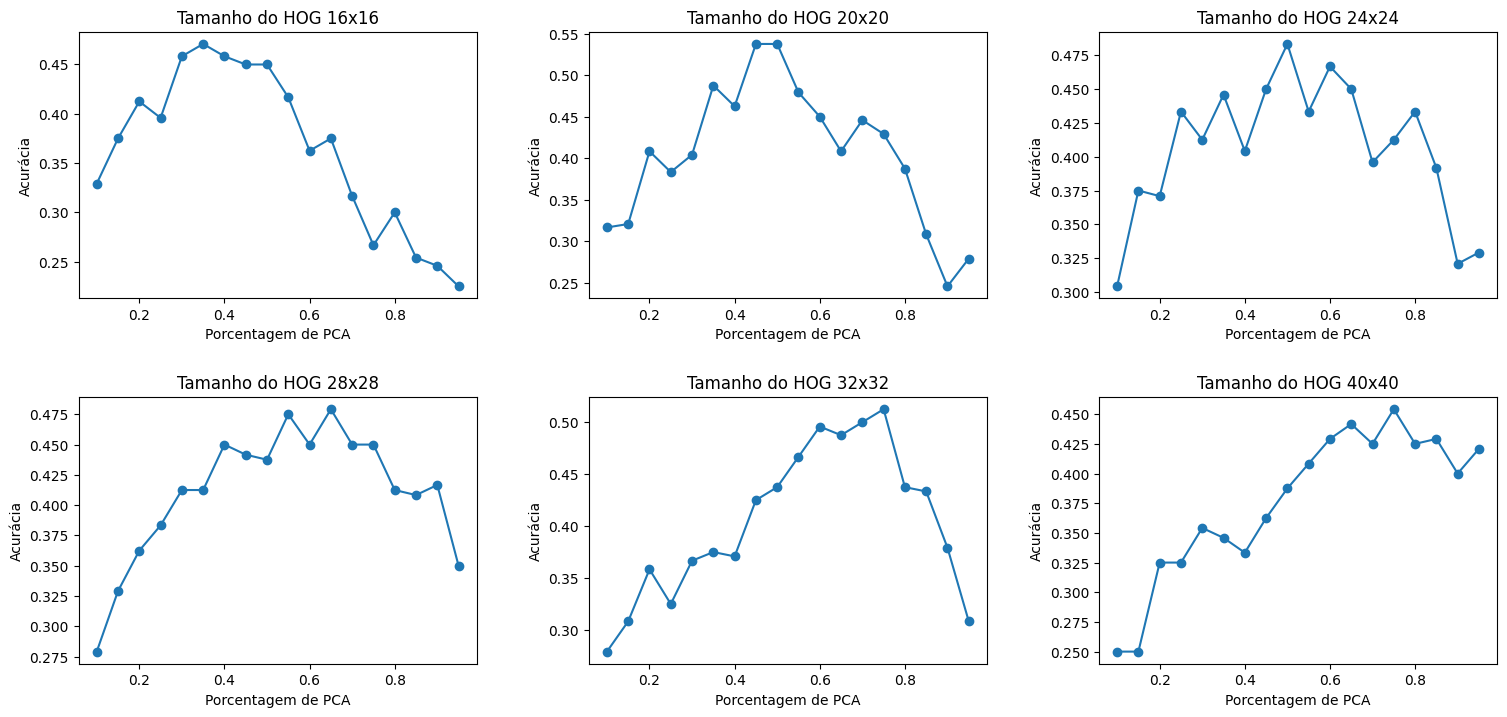

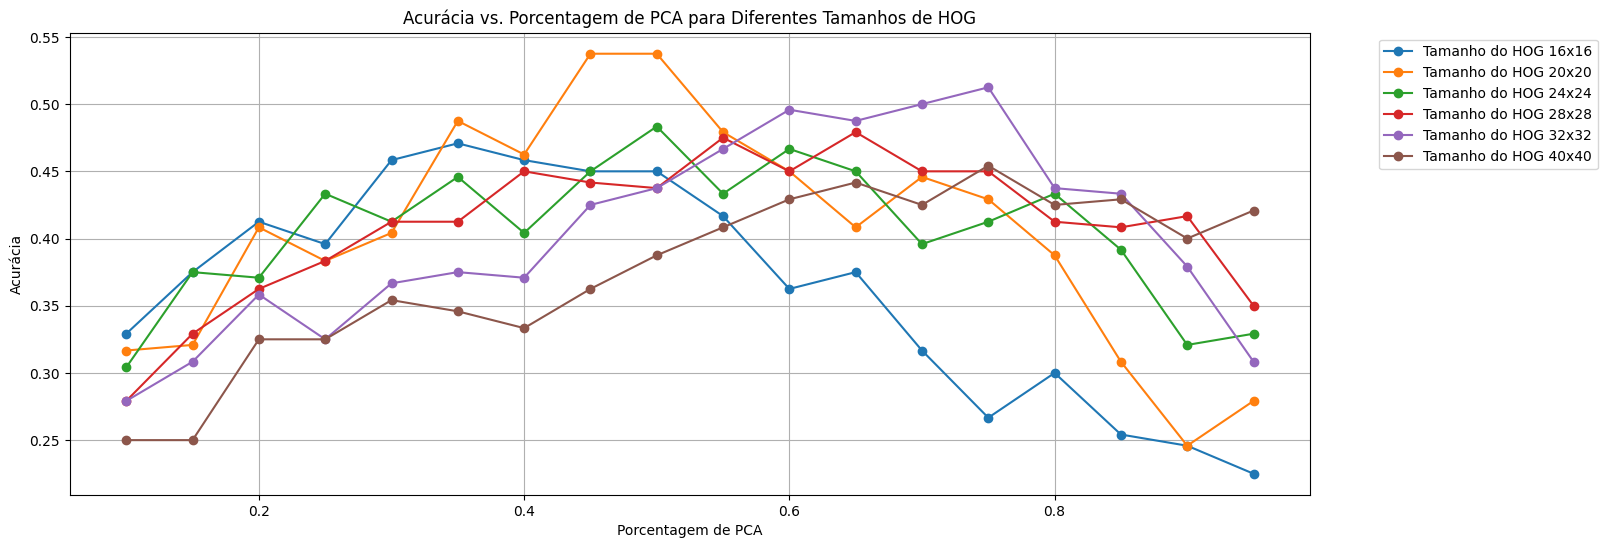

In [6]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Dicionário para armazenar as acurácias por tamanho de HOG
hog_accuracies = {}
# Lista para armazenar todas as acurácias
all_accuracies = []

# Criar uma figura com 6 subplots
fig, axs = plt.subplots(2, 3, figsize=(16, 8))
fig.tight_layout(pad=5.0)

for hogs_vetor in hogs_pcas:
  hog_size = hogs_vetor[0]
  porcent = hogs_vetor[1]
  data = hogs_vetor[2]

  y = data.classe  # Target variable
  X = data.copy().drop('classe', axis=1)  # Features

  # Split dataset into training set and test set
  X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X, y, test_size=0.3, random_state=73)  # 70% training and 30% test

  # Create KNeighborsClassifier object
  knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean') #utilizando o n_neighbors = 5 por ser mais indicado
  knn.fit(X_train_70, y_train_70)

  # Predict the response for the test dataset
  y_pred = knn.predict(X_test_30)

  # Model Accuracy
  acuracia = metrics.accuracy_score(y_test_30, y_pred)

  print(f'hog de {hog_size}x{hog_size} e pca de {porcent}')
  print('Accuracy: %.3f' % acuracia)

  # Armazenar a acurácia no dicionário usando o tamanho do HOG como chave
  if hog_size not in hog_accuracies:
    hog_accuracies[hog_size] = {'porcent': [], 'accuracies': []}
  hog_accuracies[hog_size]['porcent'].append(porcent)
  hog_accuracies[hog_size]['accuracies'].append(acuracia)

  # Matriz de confusão para 30%
  print(confusion_matrix(y_test_30, y_pred))
  print()
  # Adicionar a acurácia à lista geral
  all_accuracies.append((hog_size, porcent, acuracia))

# Criar um gráfico de linha para cada tamanho de HOG em subplots separados
for idx, (hog_size, data) in enumerate(hog_accuracies.items()):
    row = idx // 3
    col = idx % 3
    axs[row, col].plot(data['porcent'], data['accuracies'], marker='o')
    axs[row, col].set_xlabel('Porcentagem de PCA')
    axs[row, col].set_ylabel('Acurácia')
    axs[row, col].set_title(f'Tamanho do HOG {hog_size}x{hog_size}')


# Criar um gráfico de linha para cada tamanho de HOG e adicione legendas
plt.figure(figsize=(16, 6))
for hog_size, data in hog_accuracies.items():
  plt.plot(data['porcent'], data['accuracies'], marker='o', label=f'Tamanho do HOG {hog_size}x{hog_size}')

# Adicionar rótulos aos eixos
plt.xlabel('Porcentagem de PCA')
plt.ylabel('Acurácia')

# Adicionar um título ao gráfico
plt.title('Acurácia vs. Porcentagem de PCA para Diferentes Tamanhos de HOG')

# Adicionar uma legenda
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Exibir o gráfico
plt.grid()
plt.show()


# Análise de resultados

Foi visto que o hog de 20x20 obteve os 2 melhores resultados, o qual o melhor foi o com PCA de 45% com acurácia de 0.537